# 1. 케라스 내장 데이터셋 로드

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- 훈련 셋과 검증 셋을 튜플 형태로 저장

In [3]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


- 훈련 셋에는 6만 개, 검증 셋에는 1만 개 데이터가 저장
- 배열의 shape은 (데이터셋 크기, 28, 28)
    - 28, 28은 이미지의 세로, 가로의 픽셀 크기

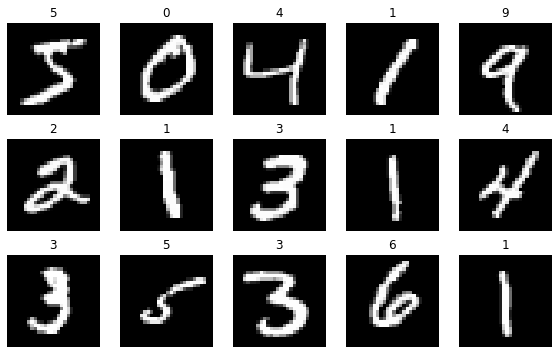

In [4]:
# 데이터 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

- 사람의 필기체로 쓰인 0~9까지의 숫자로 이루어지느 데이터 셋
- 0~9까지 총 10개의 정답 레이블로 구성

# 2. 데이터 전처리
- 이미지 데이터를 정규화하여 데이터 범위 조절

In [6]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [7]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [8]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [9]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

# 3. Flatten 레이어
- 2차원 입력은 Dense레이어에 입력값으로 넣을 수 없음
- 이미지 데이터를 1차원으로 전처리하여 주입
- 두 가지 방법으로 가능

In [11]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D로 변경 후 shape: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D로 변경 후 shape: (60000, 784)


In [13]:
print(f'변경 전 shape: {x_train.shape}')
print(f'Flatten 적용 후 shape: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후 shape: (60000, 784)


# 4. 활성화 함수
- 활성화 함수: 입력을 비선형 출력으로 변환해주는 함수

# 5. 입력과 출력

In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             # 마지막 레이어의 노드 개수 10개(클래스 개수와 동일)
                             tf.keras.layers.Dense(10, activation='softmax'),
])

- 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적(데이터의 크기는 제외)
- 마지막 레이어는 출력층
     - mnist는 0~9까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 함
- Dense 레이어 구성하는 노드의 개수: 256 - 64 - 32 - 10 으로 조금씩 개수가 줄어드는 형태로 구성
    - 784개의 변수에 대한 입력값을 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수인 10개까지 정보를 축약하기 위한 설계
    - 모델의 레이어의 개수나 노드의 개수에 대한 정답은 없음
    - 여러 가지 시도를 통해 최적의 모델 형태를 찾아야 함 (하이퍼파라미터)

# 6. 손실함수

In [17]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
model.compile(loss = 'categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss = 'sparse_categorical_crossentropy')

- 출력 데이터가 원핫 벡터가 아닌 0~9까지 레이블 값을 가짐
    - 손실 함수를 `'sparse_categorical_crossentropy'`로 지정

# 7. 옵티마이저
- 손실을 낮추기 위해 신경망의 가중치와 학습률 같은 신경망 속성을 변경하는데 사용하는 최적화 방법

In [18]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# 8. 평가지표
- `'accuracy'`, `'recall'`, `'precision'`, `'auc'` 등의 지표
- 하나 이상의 평가지표를 동시에 참고 가능

In [20]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [21]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 9. 훈련

In [22]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2396 - accuracy: 0.9291 - val_loss: 0.1155 - val_accuracy: 0.9641
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.9709 - val_loss: 0.0932 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0817 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0876 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0919 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0923 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0975 - val_accuracy:

# 10. 평가

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9788
검증 셋 정확도: 0.9787999987602234


# 11. 예측
- 예측에 필요한 새로운 데이터셋이 없으므로 검증 데이터를 그대로 사용

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0]

array([1.3608070e-09, 1.4560618e-07, 2.1770016e-07, 9.7183232e-08,
       1.2030746e-07, 4.1132528e-09, 5.2829009e-13, 9.9998081e-01,
       5.0358966e-09, 1.8537552e-05], dtype=float32)

- 10개의 확률 값 (마지막 출력층의 노드 개수)
- 0~9까지의 10개의 개별 클래스에 대한 분류 확률값

In [26]:
import numpy as np
# 0번 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))
# 첫 10개 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


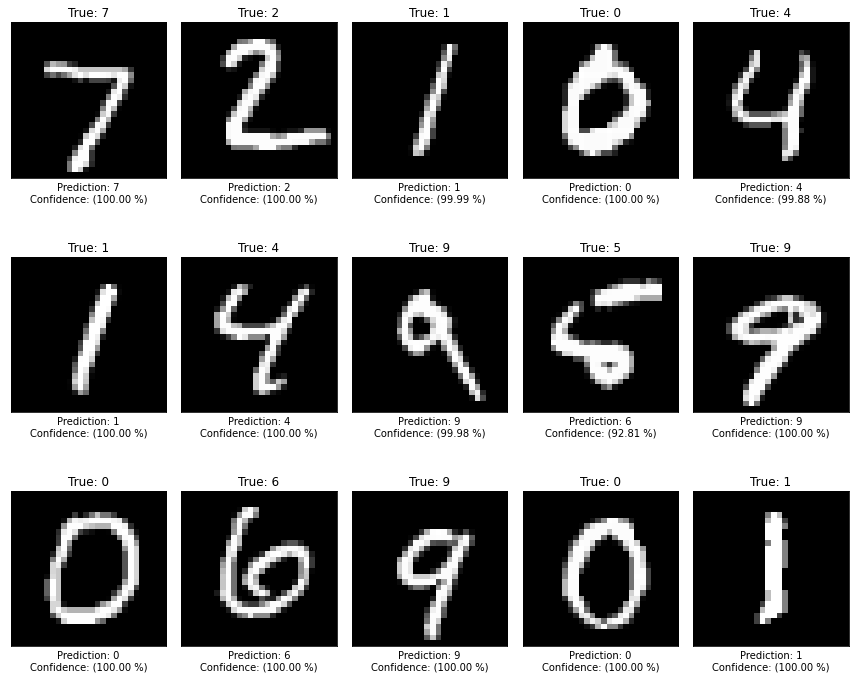

In [28]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
    ax = axes[i//5, i%5]
    img,y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()